In [187]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
import matplotlib.patches as patches
from scipy.ndimage.filters import gaussian_filter as gf

from hyss_util import *

In [188]:
# -- matplotlib defaults
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [184]:
# # -- get the file list
# fname0 = os.path.join(os.environ["LTCO_HSI0"], "full frame 20ms faster_VNIR.raw")
# fname1 = os.path.join(os.environ["LTCO_HSI1"], "night_00000.raw")

In [185]:
# # -- read HSI0
# cube0 = read_hyper(fname0)

reading and parsing full frame 20ms faster_VNIR.hdr...
reading full frame 20ms faster_VNIR.raw...


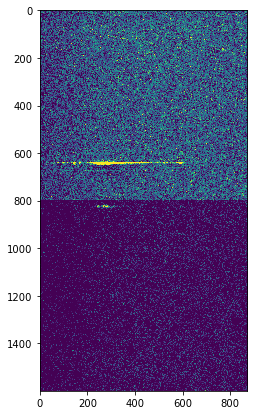

In [186]:
# # -- let's look at the signal at the sensor for the first exposure
# plt.close("all")
# plt.figure(figsize=(7, 7))
# plt.imshow(cube0.data[:, :, 975].T, clim=[50, 75], cmap="viridis")

In [2]:
# -- load both 2013 and 2018 scan
imgL_hsi0_half0 = np.load("../output/filtered_hsi0_half0.npy")
imgL_hsi0_half1 = np.load("../output/filtered_hsi0_half1.npy")
hsi0 = np.hstack([imgL_hsi0_half0, imgL_hsi0_half1])

imgL_hsi1_half0 = np.load("../output/filtered_hsi1_half0.npy")
imgL_hsi1_half1 = np.load("../output/filtered_hsi1_half1.npy")
hsi1 = np.hstack([imgL_hsi1_half0, imgL_hsi1_half1])

In [3]:
# -- get mean brightness images and save them
imgL_hsi0 = hsi0.mean(axis = 0)
imgL_hsi1 = hsi1.mean(axis = 0)


np.save("../output/hsi0_filter_mean.npy", imgL_hsi0)
np.save("../output/hsi1_filter_mean.npy", imgL_hsi1)



In [189]:
imgL_hsi0 =  np.load("../output/hsi0_filter_mean.npy")
imgL_hsi1 =  np.load("../output/hsi1_filter_mean.npy")

In [190]:
# -- get the overlapping area
img_L1 = (resize(imgL_hsi1.astype(float), (695, 1252)))[:, 165:1252]
img_L0 = imgL_hsi0[238:933, 0:1087]
nrow, ncol = img_L0.shape

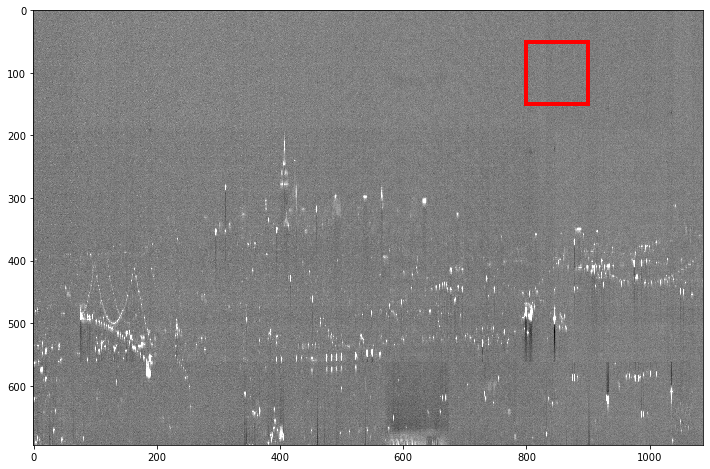

In [139]:
fig, ax = plt.subplots(figsize = (12, 8))
#plt.imshow(img_L0[50:100, 800:850], interpolation="nearest", aspect="auto")

ax.imshow(img_L0, interpolation="nearest", aspect="auto", clim=[-3, 3])
rect = patches.Rectangle((800, 50), 100, 100, linewidth=4, edgecolor='red', facecolor='none')
ax.add_patch(rect)

In [222]:
# -- calculate the slope and offset for sensor sensitivity correction
slp, off = np.polyfit(img_L1[420:465, 150:200].flatten().clip(-5, 5), img_L0[420:465, 150:200].flatten().clip(-5, 5), 1)
img3 = img_L1 * slp + off + np.random.randn(nrow, ncol) * 0.19

# -- save reshaped imgL0 and imgL3
np.save("../output/graham_hall_upload/imgL0_overlap.npy", img_L0)
#np.save("../output/img3_overlap.npy", img3)

# -- we load img3 here because the number of sources calculate by above formula will have some differences
img3 = np.load("../output/img3_overlap.npy")

In [214]:
img_L0[420:465, 150:200].std()

0.41256712258360323

In [215]:
img3[420:465, 150:200].std()

0.41767156551384527

In [216]:
slp, off 

(0.2650978091912909, -0.0016277680716079584)

In [217]:
# # -- this is for the sky
# # -- calculate the slope and offset for sensor sensitivity correction
# slp, off = np.polyfit(img_L1[50:150, 800:900].flatten().clip(-5, 5), img_L0[50:150, 800:900].flatten().clip(-5, 5), 1)
# img3 = img_L1 * slp + off + np.random.randn(nrow, ncol) * 0.18

# # -- save reshaped imgL3 and imgL3
# np.save("../output/imgL0_overlap_sky.npy", img3)


# # -- we load img3 here because the number of sources calculate by above formula will have some differences
# img3 = np.load("../output/imgL0_overlap_sky.npy")

In [218]:
slp, off 

(0.0056243695025746, -0.0204691020756009)

In [219]:
img_L0[50:150, 800:900].std()

0.18204057144793007

In [220]:
img3[50:150, 800:900].std()

0.1809257850046777

In [221]:
img_L1[50:150, 800:900].std()

0.12327725451578428

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


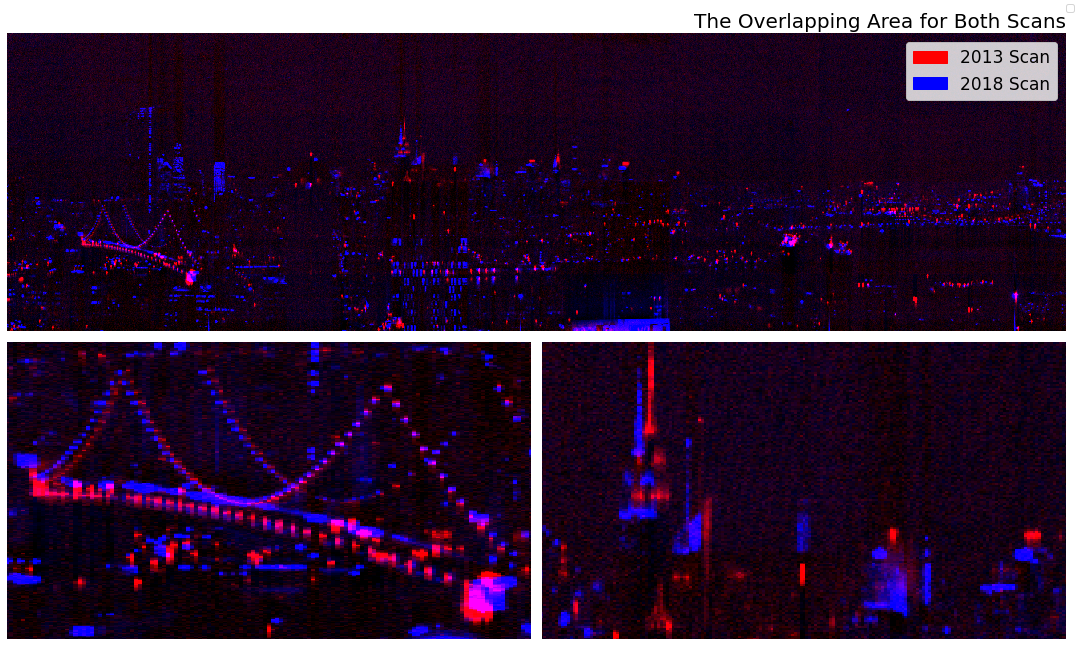

In [40]:
# -- create a 3-channel image

# -- make a 3-channel image
red = (img_L0.clip(-5, 5) + 5) / 10
blu = (img_L1.clip(-5, 5) + 5) / 10
rgb = np.dstack((red, np.zeros_like(red), blu))

rgb = (3*rgb - 1.4).clip(0, 1)


fig, ax = plt.subplots(figsize=(15, 9))

ax1 = plt.subplot(2,1,1)
ax1.imshow(rgb, interpolation="nearest", aspect="auto")
ax1.set_title("The Overlapping Area for Both Scans", loc='right', fontsize=20)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)
ax2.imshow(rgb, interpolation="nearest", aspect="auto")
ax3.imshow(rgb, interpolation="nearest", aspect="auto")
# ax[2].imshow(rgb, interpolation="nearest", aspect="auto")
ax2.set_ylim(600, 380)
ax2.set_xlim(70, 200)
ax3.set_ylim(350, 200)
ax3.set_xlim(370, 550)

axes = [ax1, ax2, ax3]
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.legend()# add legend, upper right 
fig.tight_layout()

df_legend = pd.DataFrame([
                          [0, [255, 0, 0], '2013 Scan'],
                            [1, [0, 0, 255], '2018 Scan'],
    
                          ],
                         columns=['key', 'color', 'name'])

handles_1 = [patches.Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']

ax1.legend(handles_1, labels, loc='upper right', ncol=1, fontsize=17)

fig.tight_layout()

In [116]:
img_L0

array([[ 0.08858945,  0.01462156, -0.06866399, ..., -0.14406537,
        -0.01390482, -0.03870413],
       [-0.01576835,  0.15682339, -0.14779243, ..., -0.0053039 ,
         0.18678326, -0.09375   ],
       [-0.16929472, -0.04486812, -0.00888761, ...,  0.22763761,
        -0.31307339,  0.29056766],
       ...,
       [ 0.01605505,  0.03540711,  0.08242546, ..., -0.01662844,
        -0.14836583, -0.10005734],
       [ 0.0050172 , -0.12127294,  0.12758028, ..., -0.20083142,
        -0.22247706,  0.05633601],
       [-0.07196101, -0.19137041,  0.00817087, ...,  0.03870413,
         0.45054472,  0.02866972]])

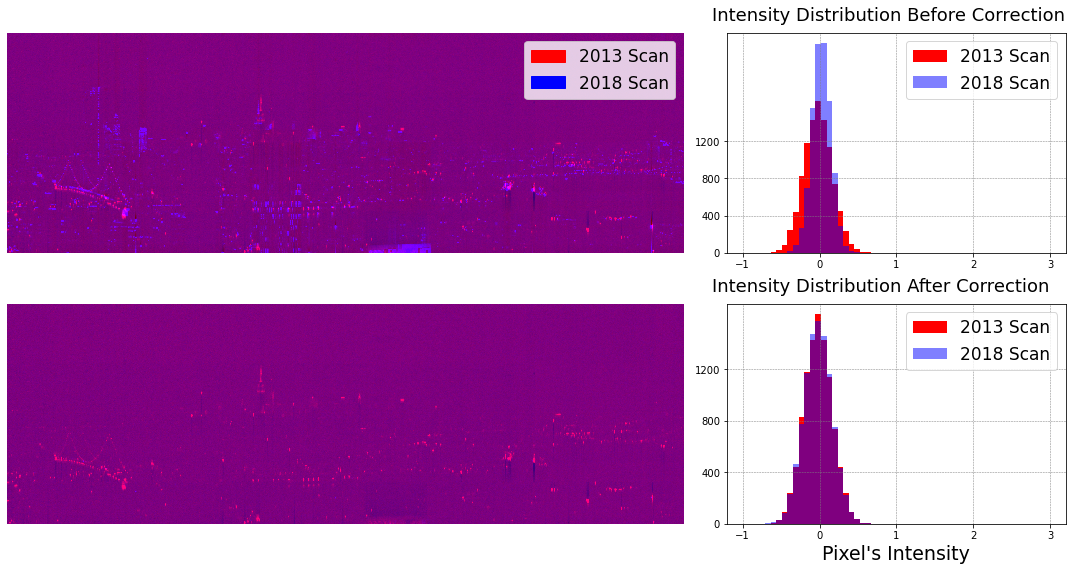

In [175]:
# -- make a 3-channel image (this is after sensor sensitivity correction)
red1 = (img_L0.clip(-5, 5) + 5) / 10
blu1 = (img3.clip(-5, 5) + 5) / 10

rgb = np.dstack((red, np.zeros_like(red), blu))
rgb1 = np.dstack((red1, np.zeros_like(red1), blu1))

rgb = np.dstack((red, np.zeros_like(red), blu))
rgb1 = np.dstack((red1, np.zeros_like(red1), blu1))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15, 8), gridspec_kw={'width_ratios': [2, 1]})


ax[0, 0].imshow(rgb, interpolation="nearest", aspect="auto")
ax[1, 0].imshow(rgb1, interpolation="nearest", aspect="auto")
ax[0, 0].axis('off')
ax[1, 0].axis('off')

# ax[0, 0].set_ylim(100, 50)
# ax[0, 0].set_xlim(800, 850)

# ax[1, 0].set_ylim(100, 50)
# ax[1, 0].set_xlim(800, 850)


ax[0, 1].hist(img_L0[50:150, 800:900].flatten(), bins=55, range = (-1, 3), color = "red")
ax[0, 1].hist(img_L1[50:150, 800:900].flatten(), bins=55,  range = (-1, 3), alpha=0.5, color = "blue");
ax[0, 1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ax[1, 1].hist(img_L0[50:150, 800:900].flatten(), bins=55,  range = (-1, 3), color = "red")
ax[1, 1].hist(img3[50:150, 800:900].flatten(), bins=55, alpha=0.5,range = (-1, 3),  color = "blue");
ax[1, 1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)
fig.text(0.663, 0.97, 'Intensity Distribution Before Correction', va='center', fontsize = 18)
fig.text(0.663, 0.50, 'Intensity Distribution After Correction', va='center', fontsize = 18)
fig.subplots_adjust(hspace=8)


ax[0, 1].legend(['2013 Scan', '2018 Scan'], fontsize=17)
ax[1, 1].legend(['2013 Scan', '2018 Scan'], fontsize=17)
ax[0, 1].set_yticks(np.arange(0, 1600, 400))
ax[1, 1].set_yticks(np.arange(0, 1600, 400))
ax[0, 1].set_xticks(np.arange(-1, 4, 1))
ax[1, 1].set_xticks(np.arange(-1, 4, 1))
ax[1, 1].set_xlabel("Pixel's Intensity", fontsize=19)

df_legend = pd.DataFrame([
                          [0, [255, 0, 0], '2013 Scan'],
                            [1, [0, 0, 255], '2018 Scan'],
    
                          ],
                         columns=['key', 'color', 'name'])

handles_1 = [patches.Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']

ax[0, 0].legend(handles_1, labels, loc='upper right', ncol=1, fontsize=17,)

fig.tight_layout()

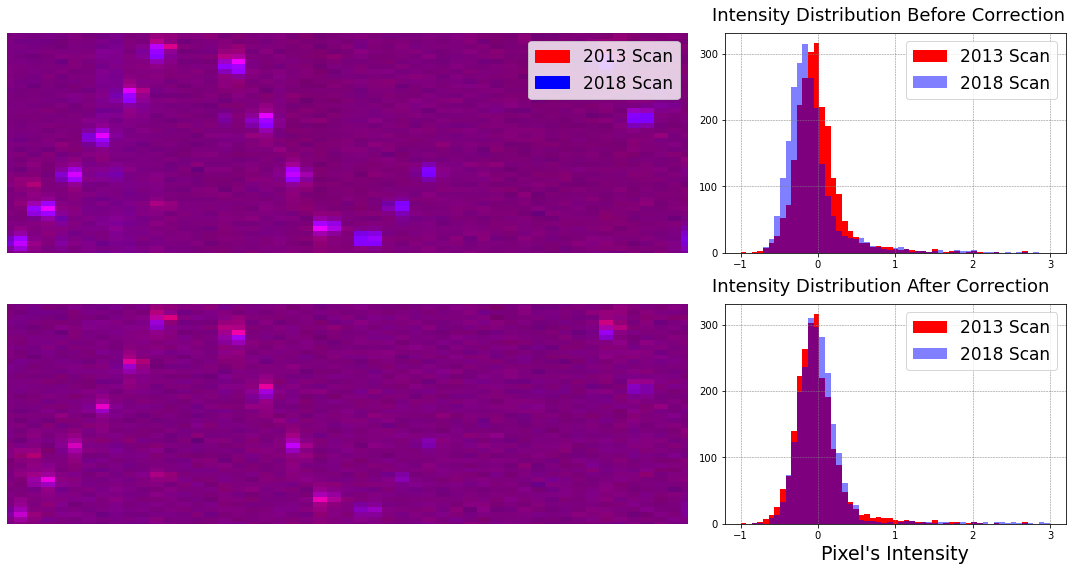

In [198]:
# -- make a 3-channel image (this is after sensor sensitivity correction)
red1 = (img_L0.clip(-5, 5) + 5) / 10
blu1 = (img3.clip(-5, 5) + 5) / 10

rgb = np.dstack((red, np.zeros_like(red), blu))
rgb1 = np.dstack((red1, np.zeros_like(red1), blu1))

rgb = np.dstack((red, np.zeros_like(red), blu))
rgb1 = np.dstack((red1, np.zeros_like(red1), blu1))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15, 8), gridspec_kw={'width_ratios': [2, 1]})


ax[0, 0].imshow(rgb, interpolation="nearest", aspect="auto")
ax[1, 0].imshow(rgb1, interpolation="nearest", aspect="auto")
ax[0, 0].axis('off')
ax[1, 0].axis('off')

ax[0, 0].set_ylim(465, 420)
ax[0, 0].set_xlim(150, 200)

ax[1, 0].set_ylim(465, 420)
ax[1, 0].set_xlim(150, 200)


ax[0, 1].hist(img_L0[420:465, 150:200].flatten(), bins=55, range = (-1, 3), color = "red")
ax[0, 1].hist(img_L1[420:465, 150:200].flatten(), bins=55,  range = (-1, 3), alpha=0.5, color = "blue");
ax[0, 1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ax[1, 1].hist(img_L0[420:465, 150:200].flatten(), bins=55,  range = (-1, 3), color = "red")
ax[1, 1].hist(img3[420:465, 150:200].flatten(), bins=55, alpha=0.5,range = (-1, 3),  color = "blue");
ax[1, 1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)
fig.text(0.663, 0.97, 'Intensity Distribution Before Correction', va='center', fontsize = 18)
fig.text(0.663, 0.50, 'Intensity Distribution After Correction', va='center', fontsize = 18)
fig.subplots_adjust(hspace=8)


ax[0, 1].legend(['2013 Scan', '2018 Scan'], fontsize=17)
ax[1, 1].legend(['2013 Scan', '2018 Scan'], fontsize=17)
ax[0, 1].set_yticks(np.arange(0, 400, 100))
ax[1, 1].set_yticks(np.arange(0, 400, 100))
ax[0, 1].set_xticks(np.arange(-1, 4, 1))
ax[1, 1].set_xticks(np.arange(-1, 4, 1))
ax[1, 1].set_xlabel("Pixel's Intensity", fontsize=19)

df_legend = pd.DataFrame([
                          [0, [255, 0, 0], '2013 Scan'],
                            [1, [0, 0, 255], '2018 Scan'],
    
                          ],
                         columns=['key', 'color', 'name'])

handles_1 = [patches.Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']

ax[0, 0].legend(handles_1, labels, loc='upper right', ncol=1, fontsize=17,)

fig.tight_layout()

In [207]:
# -- get active source location and spec for both 2013 and 2018 hyperspectral scan
# -- if raw file exists, read it, create file if not
dname = "../output/hsi0_overlap_cnn_allwave_bridge.npy" 

if os.path.isfile(dname):

  print("Active source file for the 2013 scan is existed")

else:
  dpath0 = os.path.join(os.environ["LTCO_HSI0"], "full frame 20ms faster_VNIR.raw")
  # -- read 2013 scan and then get raw spectra data for these sources
  cube = read_hyper(dpath0)

  # -- manually set threshold and apply gf
  imgL0_gf = gf(1.0 * (img_L0 > 0.7), 1) > 0.25
  imgL0_overlap = 1.0 * np.array(imgL0_gf)

  # -- get raw spec data for 'active' pixel
  img_data = cube.data

  spec = []
  for i in range(len(img_data)):
    spec.append(img_data[i][238:933, 0:1087][imgL0_gf])

  spec = np.vstack(spec)
  np.save("../output/hsi0_overlap_cnn_allwave_bridge.npy", spec)


  # -- get location for 'active' pixel and  save it
  hsi0_indices = np.argwhere(imgL0_overlap == 1)
  hsi0_indices


  np.save("../output/hsi0_overlap_location_bridge.npy", hsi0_indices)


reading and parsing full frame 20ms faster_VNIR.hdr...
reading full frame 20ms faster_VNIR.raw...


In [223]:
# -- if raw file exists, read it, create file if not
dname = "../../output/hsi1_overlap_cnn_allwave_brdge.npy" 

if os.path.isfile(dname):

  print("Active source file for the 2018 scan is existed")

else: 
 
  # -- read 2018 scan and then get raw spectra data for these sources
  dpath = os.path.join(os.environ["LTCO_HSI1"], "night_00000.raw")
  cube = read_hyper(dpath)

  # -- manually set threshold and apply gf
  imgL1_gf = gf(1.0 * (img3 > 0.7), 1) > 0.25
  imgL1_overlap = 1.0 * np.array(imgL1_gf)

  # -- get raw spec data for 'active' pixel
  img_data = cube.data

  spec = []
  for i in range(len(img_data)):
    spec.append(((resize(img_data[i], (695, 1252)))[:, 165:1252])[imgL1_gf])

  spec = np.vstack(spec)
  np.save("../output/hsi1_overlap_cnn_allwave_bridge.npy", spec)


  # -- get location for 'active' pixel and then save it
  hsi1_indices = np.argwhere(imgL1_overlap == 1)

  np.save("../output/hsi1_overlap_location_bridge.npy", hsi1_indices)

reading and parsing night_00000.hdr...
reading night_00000.raw...


In [208]:
spec = np.load("../output/hsi0_overlap_cnn_allwave_bridge.npy")
spec.shape

(872, 15075)

In [224]:
spec = np.load("../output/hsi1_overlap_cnn_allwave_bridge.npy")
spec.shape

(848, 16167)

In [ ]:
16310